In [64]:
import torch
import torch.nn as nn
from torch.optim import Adam
from torch.utils.data import Dataset, DataLoader
from torchsummary import summary
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [65]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
print(device)

cpu


In [66]:
data_df = pd.read_csv(r"D:\Datasets\Kaggle\Rice_type_classification\riceClassification.csv")
data_df.head()

,id,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,EquivDiameter,Extent,Perimeter,Roundness,AspectRation,Class
0,1,4537,92.229316,64.012769,0.719916,4677,76.004525,0.657536,273.085,0.764510,1.440796,1
1,2,2872,74.691881,51.400454,0.725553,3015,60.471018,0.713009,208.317,0.831658,1.453137,1
2,3,3048,76.293164,52.043491,0.731211,3132,62.296341,0.759153,210.012,0.868434,1.465950,1
3,4,3073,77.033628,51.928487,0.738639,3157,62.551300,0.783529,210.657,0.870203,1.483456,1
4,5,3693,85.124785,56.374021,0.749282,3802,68.571668,0.769375,230.332,0.874743,1.510000,1


In [67]:
data_df.dropna(inplace=True)
data_df.drop(['id'], axis=1, inplace=True)
print(data_df.shape)

(18185, 11)


In [68]:
print(data_df['Class'].unique())

[1 0]


In [69]:
print(data_df['Class'].value_counts())

Class
1    9985
0    8200
Name: count, dtype: int64


In [70]:
#normalizign the dataset
original_df = data_df.copy()
for column in data_df.columns:
    data_df[column] = data_df[column]/data_df[column].abs().max()
data_df.head()

,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,EquivDiameter,Extent,Perimeter,Roundness,AspectRation,Class
0,0.444368,0.503404,0.775435,0.744658,0.424873,0.666610,0.741661,0.537029,0.844997,0.368316,1.0
1,0.281293,0.407681,0.622653,0.750489,0.273892,0.530370,0.804230,0.409661,0.919215,0.371471,1.0
2,0.298531,0.416421,0.630442,0.756341,0.284520,0.546380,0.856278,0.412994,0.959862,0.374747,1.0
3,0.300979,0.420463,0.629049,0.764024,0.286791,0.548616,0.883772,0.414262,0.961818,0.379222,1.0
4,0.361704,0.464626,0.682901,0.775033,0.345385,0.601418,0.867808,0.452954,0.966836,0.386007,1.0


In [71]:
X = np.array(data_df.iloc[:, :-1])
Y = np.array(data_df.iloc[:,-1])

In [72]:
#splitting the dataset
X_train, X_test, Y_train ,Y_test = train_test_split(X,Y, test_size=0.3)

In [73]:
X_test, X_val, Y_test ,Y_val = train_test_split(X_test,Y_test, test_size=0.5)

In [74]:
print(X_train.shape)
print(X_val.shape)
print(X_test.shape)

(12729, 10)
(2728, 10)
(2728, 10)


In [75]:
#Dataset class
class dataset(Dataset):
    def __init__(self, X, Y):
        self.X = torch.tensor(X, dtype=torch.float32).to(device)
        self.Y = torch.tensor(Y, dtype=torch.float32).to(device)

    def __len__(self):
        return len(self.X)

    def __getitem__(self, index):
        return self.X[index], self.Y[index]



In [76]:
#training data
training_data = dataset(X_train, Y_train)
validatiion_data = dataset(X_val, Y_val)
testing_data = dataset(X_test, Y_test)

In [77]:
#DataLoader
train_dataloader = DataLoader(training_data, batch_size = 32, shuffle = True)
validatiion_dataloader = DataLoader(validatiion_data, batch_size = 32, shuffle = True)
testing_dataloader = DataLoader(testing_data, batch_size = 32, shuffle = True)

In [78]:
for x, y in train_dataloader:
    print(x)
    print('=======')
    print(y)
    break

tensor([[0.8731, 0.8781, 0.8677, 0.9262, 0.8376, 0.9344, 0.7432, 0.7594, 0.8303,
         0.5742],
        [0.8043, 0.8383, 0.8374, 0.9237, 0.7683, 0.8968, 0.8903, 0.7188, 0.8537,
         0.5679],
        [0.5804, 0.7904, 0.6531, 0.9600, 0.5566, 0.7618, 0.5576, 0.6459, 0.7630,
         0.6866],
        [0.8750, 0.8737, 0.8700, 0.9244, 0.8377, 0.9354, 0.7729, 0.7539, 0.8444,
         0.5698],
        [0.4119, 0.6247, 0.5710, 0.9426, 0.3913, 0.6418, 0.6179, 0.5255, 0.8178,
         0.6207],
        [0.6420, 0.8903, 0.6347, 0.9796, 0.6139, 0.8013, 0.7074, 0.7133, 0.6920,
         0.7959],
        [0.5297, 0.7952, 0.5745, 0.9780, 0.5015, 0.7278, 0.8203, 0.6336, 0.7236,
         0.7853],
        [0.6273, 0.8870, 0.6201, 0.9817, 0.5977, 0.7920, 0.5891, 0.7034, 0.6953,
         0.8116],
        [0.6399, 0.8552, 0.6602, 0.9698, 0.6095, 0.7999, 0.5483, 0.6892, 0.7388,
         0.7350],
        [0.5488, 0.8586, 0.5545, 0.9896, 0.5208, 0.7408, 0.5505, 0.6674, 0.6756,
         0.8784],
        [0

In [79]:
#Simple Model
HIDDEN_NEURONS = 10
class MyModel(nn.Module):
    def __init__(self):
        super(MyModel, self). __init__()

        self.input_layer = nn.Linear(X.shape[1], HIDDEN_NEURONS)
        self.linear = nn.Linear(HIDDEN_NEURONS, 1)
        self.sigmoid = nn.Sigmoid()
    
    def forward(self, x):
        x = self.input_layer(x)
        x = self.linear(x)
        x = self.sigmoid(x)
        return x
    

model = MyModel().to(device)




In [80]:
#Summary from torchsummary
summary(model, (X.shape[1],))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Linear-1                   [-1, 10]             110
            Linear-2                    [-1, 1]              11
           Sigmoid-3                    [-1, 1]               0
Total params: 121
Trainable params: 121
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forward/backward pass size (MB): 0.00
Params size (MB): 0.00
Estimated Total Size (MB): 0.00
----------------------------------------------------------------


In [81]:
#Loss function and optimizier
criterion = nn.BCELoss()
optimizer = Adam(model.parameters(), lr = 1e-3)

In [82]:
#training loop
total_loss_train_plot = []
total_loss_validation_plot = []
total_acc_train_plot = []
total_acc_validation_plot = []

epochs = 10
for epoch in range(epochs):
    total_acc_train = 0
    total_loss_train = 0
    total_acc_val = 0
    total_loss_val = 0

    for data in train_dataloader:
        inputs, labels = data

        prediction = model(inputs).squeeze(1)
        
        batch_loss = criterion(prediction, labels)
        
        total_loss_train += batch_loss.item()

        acc = ((prediction).round()==labels).sum().item()
        
        total_acc_train += acc

        batch_loss.backward()
        optimizer.step()
        optimizer.zero_grad()

    with torch.no_grad():
        for data in validatiion_dataloader:
            inputs, labels = data

            prediction = model(inputs).squeeze(1)
            batch_loss = criterion(prediction, labels)
            
            total_loss_val += batch_loss.item()
            acc = ((prediction).round()==labels).sum().item()

            total_acc_val += acc

        total_loss_train_plot.append(round(total_loss_train/1000,4))
        total_loss_validation_plot.append(round(total_loss_val/1000,4))

        total_acc_train_plot.append(round(total_acc_train/training_data.__len__() * 100,4))
        total_acc_validation_plot.append(round(total_acc_val/validatiion_data.__len__() * 100,4))

        print(f'''Epoch no: {epoch + 1} Train Loss: {round(total_loss_train/1000,4)} Train Accuracy: {round(total_acc_train/training_data.__len__() * 100,4)} 
        Validation loss: {round(total_loss_val/1000,4)} Validation Accuracy:{(total_acc_val/validatiion_data.__len__() * 100,4)}''')
        print("="*25)



Epoch no: 1 Train Loss: 0.2328 Train Accuracy: 84.6335 
        Validation loss: 0.0376 Validation Accuracy:(97.61730205278593, 4)
Epoch no: 2 Train Loss: 0.1169 Train Accuracy: 98.0281 
        Validation loss: 0.0166 Validation Accuracy:(97.91055718475073, 4)
Epoch no: 3 Train Loss: 0.056 Train Accuracy: 98.3267 
        Validation loss: 0.0095 Validation Accuracy:(98.42375366568915, 4)
Epoch no: 4 Train Loss: 0.0358 Train Accuracy: 98.4759 
        Validation loss: 0.0069 Validation Accuracy:(98.38709677419355, 4)
Epoch no: 5 Train Loss: 0.0275 Train Accuracy: 98.5702 
        Validation loss: 0.0058 Validation Accuracy:(98.38709677419355, 4)
Epoch no: 6 Train Loss: 0.0234 Train Accuracy: 98.6095 
        Validation loss: 0.0051 Validation Accuracy:(98.38709677419355, 4)
Epoch no: 7 Train Loss: 0.021 Train Accuracy: 98.6173 
        Validation loss: 0.0046 Validation Accuracy:(98.60703812316716, 4)
Epoch no: 8 Train Loss: 0.0195 Train Accuracy: 98.5545 
        Validation loss: 0.00

In [83]:
#Testing the model
with torch.no_grad():
    total_loss_test = 0
    total_acc_test = 0
    for data in testing_dataloader:
        inputs, labels = data

        prediction = model(inputs).squeeze(1)

        batch_loss_test = criterion(prediction, labels).item()
        total_loss_test += batch_loss_test

        acc = ((prediction).round()==labels).sum().item()
        
        total_acc_test += acc

print('Accuracy:', round(total_acc_test/testing_data.__len__() * 100,4))

Accuracy: 98.7537


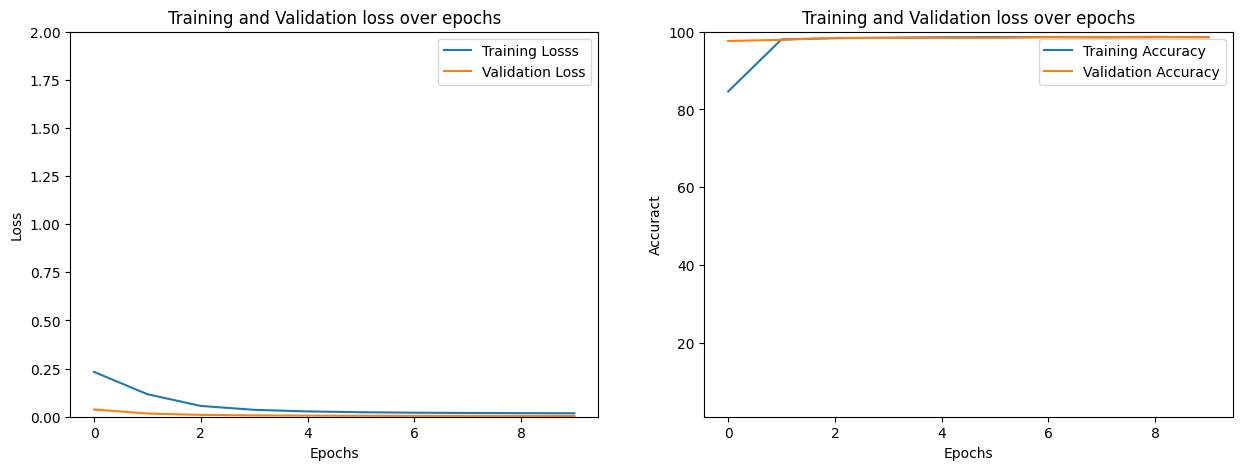

In [84]:
#plot for better visualiztion

fig, axs = plt.subplots(nrows = 1, ncols = 2, figsize = (15,5))
axs[0].plot(total_loss_train_plot, label = "Training Losss")
axs[0].plot(total_loss_validation_plot, label = "Validation Loss")
axs[0].set_title("Training and Validation loss over epochs")
axs[0].set_xlabel('Epochs')
axs[0].set_ylabel('Loss')
axs[0].set_ylim([0,2])
axs[0].legend()


axs[1].plot(total_acc_train_plot, label = "Training Accuracy")
axs[1].plot(total_acc_validation_plot, label = "Validation Accuracy")
axs[1].set_title("Training and Validation loss over epochs")
axs[1].set_xlabel('Epochs')
axs[1].set_ylabel('Accuract')
axs[1].set_ylim([1,100])
axs[1].legend()

plt.show()